# PART 2: Data Visualization and Analysis

In [1]:
#!python -m pip install -U pip
#!python -m pip install -U matplotlib
#!python -m pip install -U sklearn

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

## Working with UFC&Event Data

In [3]:
# Import data
ufc_event_data = pd.read_csv("data_files/ufc&event_info.csv")
ufc_event_data

,Unnamed: 0,Event ID,Date,Short Name,Name,Date Time,Red Fighter Name,Blue Fighter Name,American Odd that Red Fighter Will Win,American Odd that Blue Fighter Will Win,...,Blue Significant Strikes Landed/min,Blue Significant Striking Accuracy,Blue Average Submissions Attempted/15min,Blue Average Takedowns Landed/15min,Blue Takedown Accuracy,Red Significant Strikes Landed/min,Red Significant Striking Accuracy,Red Average Submissions Attempted/15min,Red Average Takedowns Landed/15min,Red Takedown Accuracy
0,0,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Jon Jones,Dominick Reyes,-460.0,365.0,...,5.03,0.52,0.4,0.39,0.16,4.31,0.57,0.5,1.90,0.46
1,1,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Valentina Shevchenko,Katlyn Chookagian,-920.0,610.0,...,4.35,0.32,0.1,0.00,0.00,3.02,0.49,0.4,1.94,0.51
2,2,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Juan Adams,Justin Tafa,-240.0,200.0,...,2.77,0.66,0.0,0.00,0.00,7.32,0.55,0.0,0.97,0.66
3,3,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Mirsad Bektic,Dan Ige,-125.0,105.0,...,4.15,0.49,1.0,2.73,0.34,2.88,0.42,0.4,3.38,0.53
4,4,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Derrick Lewis,Ilir Latifi,-225.0,185.0,...,2.29,0.40,0.5,1.85,0.30,2.63,0.49,0.0,0.52,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,363,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Giga Chikadze,Jamey Simmons,-835.0,525.0,...,0.00,0.00,0.0,0.00,0.00,3.52,0.43,0.0,0.40,0.40
364,364,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Alexandr Romanov,Marcos Rogerio de Lima,-455.0,330.0,...,3.78,0.54,0.8,0.76,0.60,5.87,0.37,3.2,6.41,1.00
365,365,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Darren Elkins,Eduardo Garagorri,-240.0,185.0,...,3.75,0.54,0.0,0.79,1.00,3.54,0.37,1.2,2.43,0.33
366,366,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Max Griffin,Ramiz Brahimaj,-143.0,115.0,...,0.00,0.00,0.0,0.00,0.00,3.87,0.49,0.5,1.90,0.55


In [4]:
# 2020/7/11, event id 121, first match day with COVID
# Remove unnecessary column
del ufc_event_data["Unnamed: 0"]

In [5]:
# Create a new column to hold pre/during COVID label
# Create a new column to hold Red Odds
# Create a new column to hold Blue Odds
ufc_event_data["Pre/During COVID"] = ""
ufc_event_data["Red Odds"] = ""
ufc_event_data["Blue Odds"] = ""
# Move it to the front
column_name = "Pre/During COVID"
first_column = ufc_event_data.pop(column_name)
ufc_event_data.insert(0,column_name,first_column)
ufc_event_data.head()

,Pre/During COVID,Event ID,Date,Short Name,Name,Date Time,Red Fighter Name,Blue Fighter Name,American Odd that Red Fighter Will Win,American Odd that Blue Fighter Will Win,...,Blue Average Submissions Attempted/15min,Blue Average Takedowns Landed/15min,Blue Takedown Accuracy,Red Significant Strikes Landed/min,Red Significant Striking Accuracy,Red Average Submissions Attempted/15min,Red Average Takedowns Landed/15min,Red Takedown Accuracy,Red Odds,Blue Odds
0,,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Jon Jones,Dominick Reyes,-460.0,365.0,...,0.4,0.39,0.16,4.31,0.57,0.5,1.90,0.46,,
1,,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Valentina Shevchenko,Katlyn Chookagian,-920.0,610.0,...,0.1,0.00,0.00,3.02,0.49,0.4,1.94,0.51,,
2,,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Juan Adams,Justin Tafa,-240.0,200.0,...,0.0,0.00,0.00,7.32,0.55,0.0,0.97,0.66,,
3,,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Mirsad Bektic,Dan Ige,-125.0,105.0,...,1.0,2.73,0.34,2.88,0.42,0.4,3.38,0.53,,
4,,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Derrick Lewis,Ilir Latifi,-225.0,185.0,...,0.5,1.85,0.30,2.63,0.49,0.0,0.52,0.25,,


In [6]:
# Display the list of dates
ufc_event_data["Date"].unique()

array(['2020-02-08', '2020-02-15', '2020-02-22', '2020-02-29',
       '2020-03-07', '2020-03-14', '2020-05-09', '2020-05-13',
       '2020-05-16', '2020-05-30', '2020-06-06', '2020-06-13',
       '2020-06-20', '2020-06-27', '2020-07-11', '2020-07-15',
       '2020-07-18', '2020-07-25', '2020-08-01', '2020-08-08',
       '2020-08-15', '2020-08-22', '2020-08-29', '2020-09-05',
       '2020-09-12', '2020-09-19', '2020-09-26', '2020-10-03',
       '2020-10-10', '2020-10-17', '2020-10-24', '2020-10-31',
       '2020-11-07'], dtype=object)

In [7]:
# Identify the location of 2020-07-11
rowindex = ufc_event_data.index[ufc_event_data["Date"]=='2020-07-11']
rowindex

Int64Index([160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172], dtype='int64')

In [8]:
# Label the date before 2020-07-11 with "Pre_COVID" in Pre/During COVID column
# Label the date from 2020-07-11 on with "During_COVID" in Pre/During COVID column
rowrange = list(range(159))
rowduring = list(range(160,368))
ufc_event_data.loc[rowrange, "Pre/During COVID"] = "Pre_COVID"
ufc_event_data.loc[rowduring, "Pre/During COVID"] = "During_COVID"
ufc_event_data

,Pre/During COVID,Event ID,Date,Short Name,Name,Date Time,Red Fighter Name,Blue Fighter Name,American Odd that Red Fighter Will Win,American Odd that Blue Fighter Will Win,...,Blue Average Submissions Attempted/15min,Blue Average Takedowns Landed/15min,Blue Takedown Accuracy,Red Significant Strikes Landed/min,Red Significant Striking Accuracy,Red Average Submissions Attempted/15min,Red Average Takedowns Landed/15min,Red Takedown Accuracy,Red Odds,Blue Odds
0,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Jon Jones,Dominick Reyes,-460.0,365.0,...,0.4,0.39,0.16,4.31,0.57,0.5,1.90,0.46,,
1,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Valentina Shevchenko,Katlyn Chookagian,-920.0,610.0,...,0.1,0.00,0.00,3.02,0.49,0.4,1.94,0.51,,
2,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Juan Adams,Justin Tafa,-240.0,200.0,...,0.0,0.00,0.00,7.32,0.55,0.0,0.97,0.66,,
3,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Mirsad Bektic,Dan Ige,-125.0,105.0,...,1.0,2.73,0.34,2.88,0.42,0.4,3.38,0.53,,
4,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Derrick Lewis,Ilir Latifi,-225.0,185.0,...,0.5,1.85,0.30,2.63,0.49,0.0,0.52,0.25,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Giga Chikadze,Jamey Simmons,-835.0,525.0,...,0.0,0.00,0.00,3.52,0.43,0.0,0.40,0.40,,
364,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Alexandr Romanov,Marcos Rogerio de Lima,-455.0,330.0,...,0.8,0.76,0.60,5.87,0.37,3.2,6.41,1.00,,
365,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Darren Elkins,Eduardo Garagorri,-240.0,185.0,...,0.0,0.79,1.00,3.54,0.37,1.2,2.43,0.33,,
366,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Max Griffin,Ramiz Brahimaj,-143.0,115.0,...,0.0,0.00,0.00,3.87,0.49,0.5,1.90,0.55,,


In [9]:
# Add boolean values to the red odds and blue odds columns
bet_correct_index = ufc_event_data.index[ufc_event_data["American Odd that Red Fighter Will Win"] < 0]
bet_wrong_index = ufc_event_data.index[ufc_event_data["American Odd that Red Fighter Will Win"] > 0]
ufc_event_data.loc[bet_correct_index, "Red Odds"] = "For"
ufc_event_data.loc[bet_wrong_index, "Red Odds"] = "Not For"

bbet_correct_index = ufc_event_data.index[ufc_event_data["American Odd that Blue Fighter Will Win"] < 0]
bbet_wrong_index = ufc_event_data.index[ufc_event_data["American Odd that Blue Fighter Will Win"] > 0]
ufc_event_data.loc[bbet_correct_index, "Blue Odds"] = "For"
ufc_event_data.loc[bbet_wrong_index, "Blue Odds"] = "Not For"

ufc_event_data

,Pre/During COVID,Event ID,Date,Short Name,Name,Date Time,Red Fighter Name,Blue Fighter Name,American Odd that Red Fighter Will Win,American Odd that Blue Fighter Will Win,...,Blue Average Submissions Attempted/15min,Blue Average Takedowns Landed/15min,Blue Takedown Accuracy,Red Significant Strikes Landed/min,Red Significant Striking Accuracy,Red Average Submissions Attempted/15min,Red Average Takedowns Landed/15min,Red Takedown Accuracy,Red Odds,Blue Odds
0,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Jon Jones,Dominick Reyes,-460.0,365.0,...,0.4,0.39,0.16,4.31,0.57,0.5,1.90,0.46,For,Not For
1,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Valentina Shevchenko,Katlyn Chookagian,-920.0,610.0,...,0.1,0.00,0.00,3.02,0.49,0.4,1.94,0.51,For,Not For
2,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Juan Adams,Justin Tafa,-240.0,200.0,...,0.0,0.00,0.00,7.32,0.55,0.0,0.97,0.66,For,Not For
3,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Mirsad Bektic,Dan Ige,-125.0,105.0,...,1.0,2.73,0.34,2.88,0.42,0.4,3.38,0.53,For,Not For
4,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Derrick Lewis,Ilir Latifi,-225.0,185.0,...,0.5,1.85,0.30,2.63,0.49,0.0,0.52,0.25,For,Not For
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Giga Chikadze,Jamey Simmons,-835.0,525.0,...,0.0,0.00,0.00,3.52,0.43,0.0,0.40,0.40,For,Not For
364,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Alexandr Romanov,Marcos Rogerio de Lima,-455.0,330.0,...,0.8,0.76,0.60,5.87,0.37,3.2,6.41,1.00,For,Not For
365,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Darren Elkins,Eduardo Garagorri,-240.0,185.0,...,0.0,0.79,1.00,3.54,0.37,1.2,2.43,0.33,For,Not For
366,During_COVID,162,2020-11-07,UFC Fight Night,UFC Fight Night: Santos vs. Teixeira,2020-11-07T19:30:00,Max Griffin,Ramiz Brahimaj,-143.0,115.0,...,0.0,0.00,0.00,3.87,0.49,0.5,1.90,0.55,For,Not For


###### Pre-COVID on Betting Odds

In [10]:
# Get the pre_covid data
pre_covid_event = ufc_event_data.loc[ufc_event_data["Pre/During COVID"]=="Pre_COVID"]
pre_covid_event

,Pre/During COVID,Event ID,Date,Short Name,Name,Date Time,Red Fighter Name,Blue Fighter Name,American Odd that Red Fighter Will Win,American Odd that Blue Fighter Will Win,...,Blue Average Submissions Attempted/15min,Blue Average Takedowns Landed/15min,Blue Takedown Accuracy,Red Significant Strikes Landed/min,Red Significant Striking Accuracy,Red Average Submissions Attempted/15min,Red Average Takedowns Landed/15min,Red Takedown Accuracy,Red Odds,Blue Odds
0,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Jon Jones,Dominick Reyes,-460.0,365.0,...,0.4,0.39,0.16,4.31,0.57,0.5,1.90,0.46,For,Not For
1,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Valentina Shevchenko,Katlyn Chookagian,-920.0,610.0,...,0.1,0.00,0.00,3.02,0.49,0.4,1.94,0.51,For,Not For
2,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Juan Adams,Justin Tafa,-240.0,200.0,...,0.0,0.00,0.00,7.32,0.55,0.0,0.97,0.66,For,Not For
3,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Mirsad Bektic,Dan Ige,-125.0,105.0,...,1.0,2.73,0.34,2.88,0.42,0.4,3.38,0.53,For,Not For
4,Pre_COVID,105,2020-02-08,UFC 247,UFC 247: Jones vs. Reyes,2020-02-08T18:30:00,Derrick Lewis,Ilir Latifi,-225.0,185.0,...,0.5,1.85,0.30,2.63,0.49,0.0,0.52,0.25,For,Not For
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Pre_COVID,131,2020-06-27,UFC Fight Night,UFC Fight Night: Poirier vs. Hooker,2020-06-27T18:00:00,Mara Romero Borella,Miranda Maverick,230.0,-305.0,...,0.0,0.00,0.00,2.54,0.37,0.2,1.66,0.43,Not For,For
155,Pre_COVID,131,2020-06-27,UFC Fight Night,UFC Fight Night: Poirier vs. Hooker,2020-06-27T18:00:00,Philipe Lins,Tanner Boser,-112.0,-112.0,...,0.0,0.00,0.00,2.73,0.41,0.0,0.00,0.00,For,For
156,Pre_COVID,131,2020-06-27,UFC Fight Night,UFC Fight Night: Poirier vs. Hooker,2020-06-27T18:00:00,Sean Woodson,Julian Erosa,-455.0,325.0,...,0.8,0.83,0.60,5.27,0.43,0.0,0.00,0.00,For,Not For
157,Pre_COVID,131,2020-06-27,UFC Fight Night,UFC Fight Night: Poirier vs. Hooker,2020-06-27T18:00:00,Takashi Sato,Jason Witt,-278.0,215.0,...,0.0,0.00,0.00,3.13,0.36,0.0,0.82,0.50,For,Not For


In [11]:
# If the winner of the fight is red and the red odd is for
right_bet = pre_covid_event.loc[(pre_covid_event["Winner of the Fight"] == "Red") &
                                (pre_covid_event["Red Odds"] == "For")]
len(right_bet)

74

In [12]:
# If the winner of the fight is red and the red odd is not for
wrong_bet = pre_covid_event.loc[(pre_covid_event["Winner of the Fight"] == "Red") &
                                (pre_covid_event["Red Odds"] == "Not For")]
len(wrong_bet)

27

In [13]:
# If the winner of the fight is blue and the blue odd is for
b_right_bet = pre_covid_event.loc[(pre_covid_event["Winner of the Fight"] == "Blue") &
                                (pre_covid_event["Blue Odds"] == "For")]
len(b_right_bet)

28

In [14]:
# If the winner of the fight is blue and the blue odd is not for
b_wrong_bet = pre_covid_event.loc[(pre_covid_event["Winner of the Fight"] == "Blue") &
                                (pre_covid_event["Blue Odds"] == "Not For")]
len(b_wrong_bet)

30

In [15]:
# Total of right bets
right_bets = len(right_bet)+len(b_right_bet)
right_bets

102

In [16]:
# Total of wrong bets
wrong_bets = len(wrong_bet)+ len(b_wrong_bet)
wrong_bets

57

In [17]:
# Percentage of right bets
total_right = right_bets+wrong_bets
right_bets_percentage = right_bets/total_right
right_bets_percentage

0.6415094339622641

In [18]:
# Percentage of wrong bets
wrong_bets_percentage = wrong_bets/total_right
wrong_bets_percentage

0.3584905660377358

###### During-COVID on Betting Odds

In [19]:
# Get the during_covid data
during_covid_event = ufc_event_data.loc[ufc_event_data["Pre/During COVID"]=="During_COVID"]

In [20]:
# If the winner of the fight is red and the red odd is for
du_right_bet = during_covid_event.loc[(during_covid_event["Winner of the Fight"] == "Red") &
                                (during_covid_event["Red Odds"] == "For")]
len(du_right_bet)

103

In [21]:
# If the winner of the fight is red and the red odd is not for
du_wrong_bet = during_covid_event.loc[(during_covid_event["Winner of the Fight"] == "Red") &
                                (during_covid_event["Red Odds"] == "Not For")]
len(du_wrong_bet)

23

In [22]:
# If the winner of the fight is blue and the blue odd is for
b_du_right_bet = during_covid_event.loc[(during_covid_event["Winner of the Fight"] == "Blue") &
                                (during_covid_event["Blue Odds"] == "For")]
len(b_du_right_bet)

47

In [23]:
# If the winner of the fight is blue and the blue odd is not for
b_du_wrong_bet = during_covid_event.loc[(during_covid_event["Winner of the Fight"] == "Blue") &
                                (during_covid_event["Blue Odds"] == "Not For")]
len(b_du_wrong_bet)

35

In [24]:
# Total of right bets
total_du_right_bets = len(du_right_bet)+len(b_du_right_bet)
total_du_right_bets

150

In [25]:
# Total of wrong bets
total_du_wrong_bets = len(du_wrong_bet)+ len(b_du_wrong_bet)
total_du_wrong_bets

58

In [26]:
# Percentage of right bets
du_total_right = total_du_right_bets + total_du_wrong_bets
du_right_bets_percentage = total_du_right_bets/du_total_right
du_right_bets_percentage

0.7211538461538461

In [27]:
# Percentage of right bets
du_wrong_bets_percentage = total_du_wrong_bets/du_total_right
du_wrong_bets_percentage

0.27884615384615385

#### Combined Stats DataFrame

In [94]:
# Create a dataframe for these values
time_column = ["Pre_COVID", "During_COVID"]
rights_list = [right_bets, total_du_right_bets]
wrong_list = [wrong_bets, total_du_wrong_bets]
betting_data = pd.DataFrame({"Time":time_column,
                            "Right Betting":rights_list,
                            "Wrong Betting":wrong_list})
betting_data.T

,0,1
Time,Pre_COVID,During_COVID
Right Betting,102,150
Wrong Betting,57,58


In [96]:
pre_percentage_bets = [right_bets_percentage,wrong_bets_percentage]

Text(0.5, 1.0, 'Pre-COVID: Fight Result')

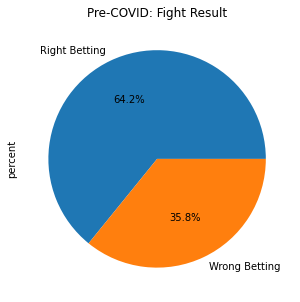

In [97]:
#Pre-Covid right vs wrong betting
# df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
#                    'radius': [2439.7, 6051.8, 6378.1]},
#                   index=['Mercury', 'Venus', 'Earth'])
# plot = df.plot.pie(y='mass', figsize=(5, 5))

df = pd.DataFrame({'percent': pre_percentage_bets}, index=['Right Betting', "Wrong Betting"])
plot = df.plot.pie(y='percent', figsize=(5, 5), autopct="%1.1f%%", legend=None)
plt.title("Pre-COVID: Fight Result")

In [100]:
dur_covid_bets = [du_right_bets_percentage, du_wrong_bets_percentage]

Text(0.5, 1.0, 'During COVID: Fight Result')

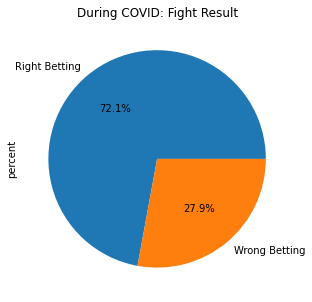

In [102]:
#During Covid right vs wrong betting
#Pre-Covid right vs wrong betting
# df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
#                    'radius': [2439.7, 6051.8, 6378.1]},
#                   index=['Mercury', 'Venus', 'Earth'])
# plot = df.plot.pie(y='mass', figsize=(5, 5))

df = pd.DataFrame({'percent':dur_covid_bets }, index=['Right Betting', "Wrong Betting"])
plot = df.plot.pie(y='percent', figsize=(5, 5), autopct="%1.1f%%", legend=None)
plt.title("During COVID: Fight Result")

###### Pre-COVID On Fight Info

In [29]:
# Get a list of the columns
pre_covid_event.columns

Index(['Pre/During COVID', 'Event ID', 'Date', 'Short Name', 'Name',
       'Date Time', 'Red Fighter Name', 'Blue Fighter Name',
       'American Odd that Red Fighter Will Win',
       'American Odd that Blue Fighter Will Win', 'Location', 'Country',
       'Winner of the Fight', 'Title Bout?', 'Weight Class',
       'Number of Rounds in Fight', 'Blue Significant Strikes Landed/min',
       'Blue Significant Striking Accuracy',
       'Blue Average Submissions Attempted/15min',
       'Blue Average Takedowns Landed/15min', 'Blue Takedown Accuracy',
       'Red Significant Strikes Landed/min',
       'Red Significant Striking Accuracy',
       'Red Average Submissions Attempted/15min',
       'Red Average Takedowns Landed/15min', 'Red Takedown Accuracy',
       'Red Odds', 'Blue Odds'],
      dtype='object')

In [30]:
# Extract only the columns on fight info
fight_info_pre = pre_covid_event[['Blue Significant Strikes Landed/min',
                                 'Red Significant Strikes Landed/min',
                                 'Blue Significant Striking Accuracy',
                                 'Red Significant Striking Accuracy',
                                 'Blue Average Submissions Attempted/15min',
                                 'Red Average Submissions Attempted/15min',
                                 'Blue Average Takedowns Landed/15min',
                                 'Red Average Takedowns Landed/15min',
                                 'Blue Takedown Accuracy',
                                 'Red Takedown Accuracy']]
fight_info_pre.mean()

Blue Significant Strikes Landed/min         3.661069
Red Significant Strikes Landed/min          3.942013
Blue Significant Striking Accuracy          0.408428
Red Significant Striking Accuracy           0.447799
Blue Average Submissions Attempted/15min    0.564151
Red Average Submissions Attempted/15min     0.679874
Blue Average Takedowns Landed/15min         1.153899
Red Average Takedowns Landed/15min          1.501698
Blue Takedown Accuracy                      0.322956
Red Takedown Accuracy                       0.366730
dtype: float64

In [31]:
# Get the weighted average for strikes for blue and red fighters
strike_mean_b = fight_info_pre['Blue Significant Strikes Landed/min'].mean()
strike_count_b = fight_info_pre['Blue Significant Strikes Landed/min'].count()
strike_mean_r = fight_info_pre['Red Significant Strikes Landed/min'].mean()
strike_count_r = fight_info_pre['Red Significant Strikes Landed/min'].count()
strikes = ((strike_mean_b * strike_count_b) + (strike_mean_r * strike_count_r))/(strike_count_b + strike_count_r)
strikes

3.8015408805031443

In [32]:
# Get the weighted average for strikes accuracy for blue and red fighters
strike_accuracy_mean_b = fight_info_pre['Blue Significant Striking Accuracy'].mean()
strike_accuracy_count_b = fight_info_pre['Blue Significant Striking Accuracy'].count()
strike_accuracy_mean_r = fight_info_pre['Red Significant Striking Accuracy'].mean()
strike_accurary_count_r = fight_info_pre['Red Significant Striking Accuracy'].count()
strikes_accuracy = ((strike_accuracy_mean_b * strike_accuracy_count_b) + (strike_accuracy_mean_r * strike_accurary_count_r))/(strike_accuracy_count_b + strike_accurary_count_r)
strikes_accuracy

0.42811320754716975

In [33]:
# Get the weighted average for submission for blue and red fighters
submission_mean_b = fight_info_pre['Blue Average Submissions Attempted/15min'].mean()
submission_count_b = fight_info_pre['Blue Average Submissions Attempted/15min'].count()
submission_mean_r = fight_info_pre['Red Average Submissions Attempted/15min'].mean()
submission_count_r = fight_info_pre['Red Average Submissions Attempted/15min'].count()
submissions = ((submission_mean_b * submission_count_b) + (submission_mean_r * submission_count_r))/(submission_count_b + submission_count_r)
submissions

0.6220125786163522

In [34]:
# Get the weighted average for takedown for blue and red fighters
takedown_mean_b = fight_info_pre['Blue Average Takedowns Landed/15min'].mean()
takedown_count_b = fight_info_pre['Blue Average Takedowns Landed/15min'].count()
takedown_mean_r = fight_info_pre['Red Average Takedowns Landed/15min'].mean()
takedown_count_r = fight_info_pre['Red Average Takedowns Landed/15min'].count()
takedowns = ((takedown_mean_b * takedown_count_b) + (takedown_mean_r * takedown_count_r))/(takedown_count_b + takedown_count_r)
takedowns

1.3277987421383646

In [35]:
# Get the weighted average for takedown accuracy for blue and red fighters
takedown_a_mean_b = fight_info_pre['Blue Takedown Accuracy'].mean()
takedown_a_count_b = fight_info_pre['Blue Takedown Accuracy'].count()
takedown_a_mean_r = fight_info_pre['Red Takedown Accuracy'].mean()
takedown_a_count_r = fight_info_pre['Red Takedown Accuracy'].count()
takedowns_accuracy = ((takedown_a_mean_b * takedown_a_count_b) + (takedown_a_mean_r * takedown_a_count_r))/(takedown_a_count_b + takedown_a_count_r)
takedowns_accuracy

0.3448427672955975

###### During-COVID On Fight Info

In [36]:
# Extract only the columns on fight info
fight_info_dur = during_covid_event[['Blue Significant Strikes Landed/min',
                                 'Red Significant Strikes Landed/min',
                                 'Blue Significant Striking Accuracy',
                                 'Red Significant Striking Accuracy',
                                 'Blue Average Submissions Attempted/15min',
                                 'Red Average Submissions Attempted/15min',
                                 'Blue Average Takedowns Landed/15min',
                                 'Red Average Takedowns Landed/15min',
                                 'Blue Takedown Accuracy',
                                 'Red Takedown Accuracy']]
fight_info_dur.mean()

Blue Significant Strikes Landed/min         3.225625
Red Significant Strikes Landed/min          3.944375
Blue Significant Striking Accuracy          0.366106
Red Significant Striking Accuracy           0.438462
Blue Average Submissions Attempted/15min    0.391827
Red Average Submissions Attempted/15min     0.659615
Blue Average Takedowns Landed/15min         1.163654
Red Average Takedowns Landed/15min          1.516490
Blue Takedown Accuracy                      0.294038
Red Takedown Accuracy                       0.372596
dtype: float64

In [37]:
# Get the weighted average for strikes for blue and red fighters
covid_strike_mean_b = fight_info_dur['Blue Significant Strikes Landed/min'].mean()
covid_strike_count_b = fight_info_dur['Blue Significant Strikes Landed/min'].count()
covid_strike_mean_r = fight_info_dur['Red Significant Strikes Landed/min'].mean()
covid_strike_count_r = fight_info_dur['Red Significant Strikes Landed/min'].count()
covid_strikes = ((covid_strike_mean_b * covid_strike_count_b) + (covid_strike_mean_r * covid_strike_count_r))/(covid_strike_count_b + covid_strike_count_r)
covid_strikes

3.5850000000000004

In [38]:
# Get the weighted average for strikes accuracy for blue and red fighters
covid_strike_accuracy_mean_b = fight_info_dur['Blue Significant Striking Accuracy'].mean()
covid_strike_accuracy_count_b = fight_info_dur['Blue Significant Striking Accuracy'].count()
covid_strike_accuracy_mean_r = fight_info_dur['Red Significant Striking Accuracy'].mean()
covid_strike_accurary_count_r = fight_info_dur['Red Significant Striking Accuracy'].count()
covid_strikes_accuracy = ((covid_strike_accuracy_mean_b * covid_strike_accuracy_count_b) + (covid_strike_accuracy_mean_r * covid_strike_accurary_count_r))/(covid_strike_accuracy_count_b + covid_strike_accurary_count_r)
covid_strikes_accuracy

0.4022836538461539

In [39]:
# Get the weighted average for submission for blue and red fighters
covid_submission_mean_b = fight_info_dur['Blue Average Submissions Attempted/15min'].mean()
covid_submission_count_b = fight_info_dur['Blue Average Submissions Attempted/15min'].count()
covid_submission_mean_r = fight_info_dur['Red Average Submissions Attempted/15min'].mean()
covid_submission_count_r = fight_info_dur['Red Average Submissions Attempted/15min'].count()
covid_submissions = ((covid_submission_mean_b * covid_submission_count_b) + (covid_submission_mean_r * covid_submission_count_r))/(covid_submission_count_b + covid_submission_count_r)
covid_submissions

0.5257211538461538

In [40]:
# Get the weighted average for takedown for blue and red fighters
covid_takedown_mean_b = fight_info_dur['Blue Average Takedowns Landed/15min'].mean()
covid_takedown_count_b = fight_info_dur['Blue Average Takedowns Landed/15min'].count()
covid_takedown_mean_r = fight_info_dur['Red Average Takedowns Landed/15min'].mean()
covid_takedown_count_r = fight_info_dur['Red Average Takedowns Landed/15min'].count()
covid_takedowns = ((covid_takedown_mean_b * covid_takedown_count_b) + (covid_takedown_mean_r * covid_takedown_count_r))/(covid_takedown_count_b + covid_takedown_count_r)
covid_takedowns

1.3400721153846153

In [41]:
# Get the weighted average for takedown accuracy for blue and red fighters
covid_takedown_a_mean_b = fight_info_dur['Blue Takedown Accuracy'].mean()
covid_takedown_a_count_b = fight_info_dur['Blue Takedown Accuracy'].count()
covid_takedown_a_mean_r = fight_info_dur['Red Takedown Accuracy'].mean()
covid_takedown_a_count_r = fight_info_dur['Red Takedown Accuracy'].count()
covid_takedowns_accuracy = ((covid_takedown_a_mean_b * covid_takedown_a_count_b) + (covid_takedown_a_mean_r * covid_takedown_a_count_r))/(covid_takedown_a_count_b + covid_takedown_a_count_r)
covid_takedowns_accuracy

0.33331730769230766

#### Combined Stats DataFrame

In [42]:
# Create a dataframe for these values
time_column = ["Pre_COVID", "During_COVID"]
strike_list = [strikes,covid_strikes]
strike_accuracy_list = [strikes_accuracy,covid_strikes_accuracy]
submission_list = [submissions,covid_submissions]
takedown_list = [takedowns,covid_takedowns]
takendown_accuracy = [takedowns_accuracy,covid_takedowns_accuracy]
fight_info_data = pd.DataFrame({"Time":time_column,
                            "Significant Strikes Landed/min":strike_list,
                            "Significant Striking Accuracy":strike_accuracy_list,
                            "Average Submissions Attempted/15min":submission_list,
                            "Average Takedowns":takedown_list,
                            "Average Takedowns Landed/15min":takendown_accuracy})
fight_info_data.T

,0,1
Time,Pre_COVID,During_COVID
Significant Strikes Landed/min,3.80154,3.585
Significant Striking Accuracy,0.428113,0.402284
Average Submissions Attempted/15min,0.622013,0.525721
Average Takedowns,1.3278,1.34007
Average Takedowns Landed/15min,0.344843,0.333317


two pie charts pre vs during

## Working with UFC Results Data

In [43]:
# Import data
ufc_result_data = pd.read_csv("data_files/UFC2020FightResults.csv")
ufc_result_data

,Unnamed: 0,W/L,FIGHTER,KD,STR,TD,SUB,WEIGHT CLASS,METHOD,ROUND,TIME
0,Pre_COVID,WIN,Jon Jones,0,104,2,0,Light Heavyweight,U-DEC,5,5:00
1,Pre_COVID,NaN,Dominick Reyes,0,116,0,0,NaN,NaN,NaN,NaN
2,Pre_COVID,WIN,Valentina Shevchenko,0,40,3,0,Women's Flyweight,KO/TKO,3,1:03
3,Pre_COVID,NaN,Katlyn Chookagian,0,17,0,0,NaN,Punches,NaN,NaN
4,Pre_COVID,WIN,Justin Tafa,1,10,0,0,Heavyweight,KO/TKO,1,1:59
...,...,...,...,...,...,...,...,...,...,...,...
758,During_COVID,NaN,Geraldo de Freitas,0,76,1,0,NaN,NaN,NaN,NaN
759,During_COVID,WIN,Alex Morono,0,176,3,0,Welterweight,U-DEC,3,5:00
760,During_COVID,NaN,Rhys McKee,0,124,0,0,NaN,NaN,NaN,NaN
761,During_COVID,WIN,Don'Tale Mayes,0,59,1,0,Heavyweight,U-DEC,3,5:00


In [44]:
# Rename column
renamed_result = ufc_result_data.rename(columns={"Unnamed: 0":"Pre/During COVID"})
renamed_result

,Pre/During COVID,W/L,FIGHTER,KD,STR,TD,SUB,WEIGHT CLASS,METHOD,ROUND,TIME
0,Pre_COVID,WIN,Jon Jones,0,104,2,0,Light Heavyweight,U-DEC,5,5:00
1,Pre_COVID,NaN,Dominick Reyes,0,116,0,0,NaN,NaN,NaN,NaN
2,Pre_COVID,WIN,Valentina Shevchenko,0,40,3,0,Women's Flyweight,KO/TKO,3,1:03
3,Pre_COVID,NaN,Katlyn Chookagian,0,17,0,0,NaN,Punches,NaN,NaN
4,Pre_COVID,WIN,Justin Tafa,1,10,0,0,Heavyweight,KO/TKO,1,1:59
...,...,...,...,...,...,...,...,...,...,...,...
758,During_COVID,NaN,Geraldo de Freitas,0,76,1,0,NaN,NaN,NaN,NaN
759,During_COVID,WIN,Alex Morono,0,176,3,0,Welterweight,U-DEC,3,5:00
760,During_COVID,NaN,Rhys McKee,0,124,0,0,NaN,NaN,NaN,NaN
761,During_COVID,WIN,Don'Tale Mayes,0,59,1,0,Heavyweight,U-DEC,3,5:00


In [45]:
# Get the pre_covid data
pre_covid_groupby = renamed_result.loc[renamed_result["Pre/During COVID"]=="Pre_COVID"]
pre_covid_groupby

,Pre/During COVID,W/L,FIGHTER,KD,STR,TD,SUB,WEIGHT CLASS,METHOD,ROUND,TIME
0,Pre_COVID,WIN,Jon Jones,0,104,2,0,Light Heavyweight,U-DEC,5,5:00
1,Pre_COVID,NaN,Dominick Reyes,0,116,0,0,NaN,NaN,NaN,NaN
2,Pre_COVID,WIN,Valentina Shevchenko,0,40,3,0,Women's Flyweight,KO/TKO,3,1:03
3,Pre_COVID,NaN,Katlyn Chookagian,0,17,0,0,NaN,Punches,NaN,NaN
4,Pre_COVID,WIN,Justin Tafa,1,10,0,0,Heavyweight,KO/TKO,1,1:59
...,...,...,...,...,...,...,...,...,...,...,...
313,Pre_COVID,NaN,Philipe Lins,0,6,0,0,NaN,Punches,NaN,NaN
314,Pre_COVID,WIN,Kay Hansen,0,31,2,1,Women's Strawweight,SUB,3,2:26
315,Pre_COVID,NaN,Jinh Yu Frey,0,26,0,0,NaN,Armbar,NaN,NaN
316,Pre_COVID,WIN,Youssef Zalal,0,59,0,0,Featherweight,U-DEC,3,5:00


##### Change in Methods?

In [46]:
# Get the count of method for pre_covid
groupby_method = pre_covid_groupby.groupby("METHOD")["Pre/During COVID"].count()
groupby_method

METHOD
Ankle Lock           1
Arm Triangle         3
Armbar               3
D'Arce Choke         1
DQ                   2
Elbow                2
Flying Knee          1
Guillotine Choke     5
KO/TKO              49
Kick                 2
Kimura               1
Knee                 2
Kneebar              1
Knees                1
M-DEC                1
Overturned           1
Punch               22
Punches             19
Rear Naked Choke    10
S-DEC               19
SUB                 25
U-DEC               62
Name: Pre/During COVID, dtype: int64

In [47]:
# Create an x axis list
# Create a pre_covid list for method
x_axis = ["KO/TKO","U-DEC","S-DEC","SUB" ]
pre_covid = [49,62,19,25]

In [48]:
# Combine U-DEC and S-DEC
pre_decision = groupby_method["S-DEC"] + groupby_method["U-DEC"]


In [49]:
pre_covid_list = [groupby_method["KO/TKO"],groupby_method["SUB"],pre_decision]
pre_covid_list
# for i in pre_covid_list: print(type(i))
    

[49, 25, 81]

In [50]:
# Get the sum
np.sum(pre_covid)
pre_covid_total = np.sum(pre_covid)
type(pre_covid_total)

numpy.int64

In [51]:
#Percentage of Method Pre-Covid
percentage_pre_covid = [x/pre_covid_total*100 for x in pre_covid_list]
percentage_pre_covid

[31.61290322580645, 16.129032258064516, 52.25806451612903]

In [52]:
#Percentage of each method
groupby_method_df = pd.DataFrame(groupby_method)
groupby_method_df

,Pre/During COVID
METHOD,
Ankle Lock,1
Arm Triangle,3
Armbar,3
D'Arce Choke,1
DQ,2
Elbow,2
Flying Knee,1
Guillotine Choke,5
KO/TKO,49


Text(0.5, 1.0, 'Pre-COVID: Fight Result')

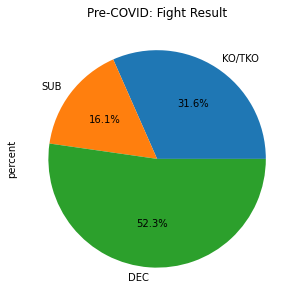

In [53]:
# df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
#                    'radius': [2439.7, 6051.8, 6378.1]},
#                   index=['Mercury', 'Venus', 'Earth'])
# plot = df.plot.pie(y='mass', figsize=(5, 5))

df = pd.DataFrame({'percent': percentage_pre_covid}, index=['KO/TKO', 'SUB', 'DEC'])
plot = df.plot.pie(y='percent', figsize=(5, 5), autopct="%1.1f%%", legend=None)
plt.title("Pre-COVID: Fight Result")


groupby_method["KO/TKO"]/np.sum(pre_covid)

In [54]:
# Get the during_covid data
during_covid_groupby = renamed_result.loc[renamed_result["Pre/During COVID"]=="During_COVID"]
during_covid_groupby

,Pre/During COVID,W/L,FIGHTER,KD,STR,TD,SUB,WEIGHT CLASS,METHOD,ROUND,TIME
319,During_COVID,WIN,Kamaru Usman,0,94,5,0,Welterweight,U-DEC,5,5:00
320,During_COVID,NaN,Jorge Masvidal,0,66,0,0,NaN,NaN,NaN,NaN
321,During_COVID,WIN,Alexander Volkanovski,0,137,3,0,Featherweight,S-DEC,5,5:00
322,During_COVID,NaN,Max Holloway,0,102,0,0,NaN,NaN,NaN,NaN
323,During_COVID,WIN,Petr Yan,1,194,1,0,Bantamweight,KO/TKO,5,3:24
...,...,...,...,...,...,...,...,...,...,...,...
758,During_COVID,NaN,Geraldo de Freitas,0,76,1,0,NaN,NaN,NaN,NaN
759,During_COVID,WIN,Alex Morono,0,176,3,0,Welterweight,U-DEC,3,5:00
760,During_COVID,NaN,Rhys McKee,0,124,0,0,NaN,NaN,NaN,NaN
761,During_COVID,WIN,Don'Tale Mayes,0,59,1,0,Heavyweight,U-DEC,3,5:00


In [55]:
# Get the count of method for during_covid
during_method = during_covid_groupby.groupby("METHOD")["Pre/During COVID"].count()
during_method

METHOD
Anaconda Choke         1
Arm Triangle           2
Armbar                10
D'Arce Choke           1
Elbow                  2
Elbows                 4
Forearm Choke          1
Guillotine Choke      10
Heel Hook              1
Injury                 1
KO/TKO                67
Kick                   8
Kimura                 1
Knee                   4
Kneebar                1
M-DEC                  2
Neck Crank             1
Overturned             2
Punch                 20
Punches               24
Rear Naked Choke      14
S-DEC                 16
SUB                   46
Spinning Back Fist     1
Spinning Back Kick     1
Triangle Choke         3
U-DEC                 89
Name: Pre/During COVID, dtype: int64

In [56]:
# Create a during_covid list for method
during_covid = [67,89,16,46]

In [57]:
# Combine U-DEC and S-DEC
dur_decision = during_method["S-DEC"] + during_method["U-DEC"]
dur_decision

105

In [58]:
dur_covid_list = [during_method["KO/TKO"],during_method["SUB"],dur_decision]
dur_covid_list
# for i in dur_covid_list: print(type(i))

[67, 46, 105]

In [59]:
#Bargraph X-axis
x_axis = ["KO/TKO", "SUB", "DEC"]
# TODO: change hard coded values to dynamic values 
pre_covid = [groupby_method["KO/TKO"], groupby_method["SUB"], pre_decision]
during_covid = [during_method["KO/TKO"], during_method["SUB"], dur_decision]

Text(0, 0.5, 'Count of Decision Result')

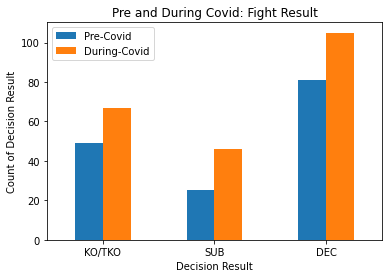

In [91]:
df = pd.DataFrame({'Pre-Covid': pre_covid,'During-Covid': during_covid}, index=x_axis)
ax = df.plot.bar(rot=0)
# Add labels to X and Y axes :: Add title
plt.title("Pre and During Covid: Fight Result")
plt.xlabel("Decision Result")
plt.ylabel("Count of Decision Result")

In [61]:
# Get the sum
np.sum(during_covid)
during_covid_total = np.sum(during_covid)
type(during_covid_total)


numpy.int64

In [62]:
#Percentage of Method During-Covid
percentage_during_covid = [x/during_covid_total*100 for x in dur_covid_list]
percentage_during_covid

[30.73394495412844, 21.100917431192663, 48.1651376146789]

In [63]:
#Percentage of each method
dur_groupby_method_df = pd.DataFrame(groupby_method)
dur_groupby_method_df

,Pre/During COVID
METHOD,
Ankle Lock,1
Arm Triangle,3
Armbar,3
D'Arce Choke,1
DQ,2
Elbow,2
Flying Knee,1
Guillotine Choke,5
KO/TKO,49


Text(0.5, 1.0, 'During Covid: Fight Result')

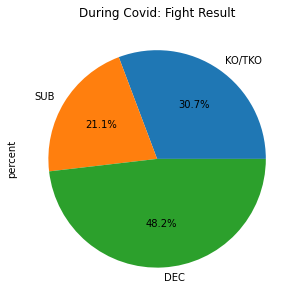

In [64]:
# df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
#                    'radius': [2439.7, 6051.8, 6378.1]},
#                   index=['Mercury', 'Venus', 'Earth'])
# plot = df.plot.pie(y='mass', figsize=(5, 5))

df = pd.DataFrame({'percent': percentage_during_covid}, index=['KO/TKO', 'SUB', 'DEC'])
plot = df.plot.pie(y='percent', figsize=(5, 5), autopct="%1.1f%%", legend=None)
plt.title("During Covid: Fight Result")

##### Diving Deeper: Weight Class

In [65]:
# Check to see what weight classes are there
renamed_result["WEIGHT CLASS"].unique()

array(['Light Heavyweight', nan, "Women's Flyweight", 'Heavyweight',
       'Featherweight', 'Middleweight', 'Welterweight', 'Bantamweight',
       'Lightweight', 'Flyweight', "Women's Bantamweight",
       "Women's Strawweight", "Women's Featherweight", 'Catch Weight',
       'WEIGHT CLASS'], dtype=object)

In [66]:
# Get the counts of method KO/TKO for weight classes for pre_covid
weight_classes = ['Light Heavyweight', "Women's Flyweight", 'Heavyweight',
       'Featherweight', 'Middleweight', 'Welterweight', 'Bantamweight',
       'Lightweight', 'Flyweight', "Women's Bantamweight",
       "Women's Strawweight", "Women's Featherweight", 'Catch Weight'
       ]
ko_tko_classes = []

for classes in weight_classes:

    ko_tko = len(pre_covid_groupby.loc[(pre_covid_groupby["WEIGHT CLASS"]== classes)
                                         & (pre_covid_groupby["METHOD"]== "KO/TKO")])
    
    ko_tko_classes.append(ko_tko)
    
    print(classes, ko_tko)

Light Heavyweight 4
Women's Flyweight 2
Heavyweight 6
Featherweight 5
Middleweight 5
Welterweight 7
Bantamweight 8
Lightweight 6
Flyweight 3
Women's Bantamweight 1
Women's Strawweight 0
Women's Featherweight 2
Catch Weight 0


In [67]:
# Get the counts of method Sub for weight classes for pre_covid
weight_classes = ['Light Heavyweight', "Women's Flyweight", 'Heavyweight',
       'Featherweight', 'Middleweight', 'Welterweight', 'Bantamweight',
       'Lightweight', 'Flyweight', "Women's Bantamweight",
       "Women's Strawweight", "Women's Featherweight", 'Catch Weight'
       ]
sub_classes = []

for classes in weight_classes:

    sub = len(pre_covid_groupby.loc[(pre_covid_groupby["WEIGHT CLASS"]== classes)
                                         & (pre_covid_groupby["METHOD"]== "SUB")])
    
    sub_classes.append(sub)
    
    print(classes, sub)

Light Heavyweight 1
Women's Flyweight 3
Heavyweight 2
Featherweight 2
Middleweight 3
Welterweight 1
Bantamweight 2
Lightweight 5
Flyweight 1
Women's Bantamweight 0
Women's Strawweight 2
Women's Featherweight 0
Catch Weight 3


In [68]:
# Get the counts of method U-DEC for weight classes for pre_covid
weight_classes = ['Light Heavyweight', "Women's Flyweight", 'Heavyweight',
       'Featherweight', 'Middleweight', 'Welterweight', 'Bantamweight',
       'Lightweight', 'Flyweight', "Women's Bantamweight",
       "Women's Strawweight", "Women's Featherweight", 'Catch Weight'
      ]
u_dec_classes = []

for classes in weight_classes:

    u_dec = len(pre_covid_groupby.loc[(pre_covid_groupby["WEIGHT CLASS"]== classes)
                                         & (pre_covid_groupby["METHOD"]== "U-DEC")])
    
    u_dec_classes.append(u_dec)
    
    print(classes, u_dec)

Light Heavyweight 4
Women's Flyweight 5
Heavyweight 5
Featherweight 9
Middleweight 3
Welterweight 10
Bantamweight 3
Lightweight 8
Flyweight 4
Women's Bantamweight 4
Women's Strawweight 4
Women's Featherweight 1
Catch Weight 2


In [69]:
# Get the counts of method S-DEC for weight classes for pre_covid
weight_classes = ['Light Heavyweight', "Women's Flyweight", 'Heavyweight',
       'Featherweight', 'Middleweight', 'Welterweight', 'Bantamweight',
       'Lightweight', 'Flyweight', "Women's Bantamweight",
       "Women's Strawweight", "Women's Featherweight", 'Catch Weight'
       ]
s_dec_classes = []

for classes in weight_classes:

    s_dec = len(pre_covid_groupby.loc[(pre_covid_groupby["WEIGHT CLASS"]== classes)
                                         & (pre_covid_groupby["METHOD"]== "S-DEC")])
    
    s_dec_classes.append(s_dec)
    
    print(classes, s_dec)

Light Heavyweight 1
Women's Flyweight 1
Heavyweight 3
Featherweight 4
Middleweight 1
Welterweight 1
Bantamweight 2
Lightweight 3
Flyweight 0
Women's Bantamweight 0
Women's Strawweight 3
Women's Featherweight 0
Catch Weight 0


In [70]:
u_dec_classes

[4, 5, 5, 9, 3, 10, 3, 8, 4, 4, 4, 1, 2]

In [71]:
s_dec_classes

[1, 1, 3, 4, 1, 1, 2, 3, 0, 0, 3, 0, 0]

In [72]:
# Adding u-dec and s-dec together
pre_decision = [x + y for x, y in zip(u_dec_classes, s_dec_classes)]
pre_decision

[5, 6, 8, 13, 4, 11, 5, 11, 4, 4, 7, 1, 2]

In [73]:
# Get the counts of method KO/TKO for weight classes for during_covid
weight_classes = ['Light Heavyweight', "Women's Flyweight", 'Heavyweight',
       'Featherweight', 'Middleweight', 'Welterweight', 'Bantamweight',
       'Lightweight', 'Flyweight', "Women's Bantamweight",
       "Women's Strawweight", "Women's Featherweight", 'Catch Weight'
       ]
covid_ko_tko_classes = []

for classes in weight_classes:

    ko_tko = len(during_covid_groupby.loc[(during_covid_groupby["WEIGHT CLASS"]== classes)
                                         & (during_covid_groupby["METHOD"]== "KO/TKO")])
    
    covid_ko_tko_classes.append(ko_tko)
    
    print(classes, ko_tko)

Light Heavyweight 12
Women's Flyweight 3
Heavyweight 11
Featherweight 5
Middleweight 12
Welterweight 6
Bantamweight 11
Lightweight 5
Flyweight 0
Women's Bantamweight 1
Women's Strawweight 0
Women's Featherweight 0
Catch Weight 1


In [74]:
# Get the counts of method Sub for weight classes for during_covid
weight_classes = ['Light Heavyweight', "Women's Flyweight", 'Heavyweight',
       'Featherweight', 'Middleweight', 'Welterweight', 'Bantamweight',
       'Lightweight', 'Flyweight', "Women's Bantamweight",
       "Women's Strawweight", "Women's Featherweight", 'Catch Weight'
       ]
covid_sub_classes = []

for classes in weight_classes:

    sub = len(during_covid_groupby.loc[(during_covid_groupby["WEIGHT CLASS"]== classes)
                                         & (during_covid_groupby["METHOD"]== "SUB")])
    
    covid_sub_classes.append(sub)
    
    print(classes, sub)

Light Heavyweight 3
Women's Flyweight 7
Heavyweight 4
Featherweight 7
Middleweight 5
Welterweight 4
Bantamweight 3
Lightweight 5
Flyweight 2
Women's Bantamweight 1
Women's Strawweight 4
Women's Featherweight 0
Catch Weight 1


In [75]:
# Get the counts of method U-DEC for weight classes for during_covid
weight_classes = ['Light Heavyweight', "Women's Flyweight", 'Heavyweight',
       'Featherweight', 'Middleweight', 'Welterweight', 'Bantamweight',
       'Lightweight', 'Flyweight', "Women's Bantamweight",
       "Women's Strawweight", "Women's Featherweight", 'Catch Weight'
       ]
covid_u_dec_classes = []

for classes in weight_classes:

    u_dec = len(during_covid_groupby.loc[(during_covid_groupby["WEIGHT CLASS"]== classes)
                                         & (during_covid_groupby["METHOD"]== "U-DEC")])
    
    covid_u_dec_classes.append(u_dec)
    
    print(classes, u_dec)

Light Heavyweight 3
Women's Flyweight 5
Heavyweight 6
Featherweight 16
Middleweight 8
Welterweight 12
Bantamweight 8
Lightweight 10
Flyweight 5
Women's Bantamweight 7
Women's Strawweight 7
Women's Featherweight 0
Catch Weight 2


In [76]:
# Get the counts of method S-DEC for weight classes for during_covid
weight_classes = ['Light Heavyweight', "Women's Flyweight", 'Heavyweight',
       'Featherweight', 'Middleweight', 'Welterweight', 'Bantamweight',
       'Lightweight', 'Flyweight', "Women's Bantamweight",
       "Women's Strawweight", "Women's Featherweight", 'Catch Weight'
       ]
covid_s_dec_classes = []

for classes in weight_classes:

    s_dec = len(during_covid_groupby.loc[(during_covid_groupby["WEIGHT CLASS"]== classes)
                                         & (during_covid_groupby["METHOD"]== "S-DEC")])
    
    covid_s_dec_classes.append(s_dec)
    
    print(classes, s_dec)

Light Heavyweight 2
Women's Flyweight 0
Heavyweight 0
Featherweight 3
Middleweight 1
Welterweight 1
Bantamweight 4
Lightweight 2
Flyweight 0
Women's Bantamweight 0
Women's Strawweight 3
Women's Featherweight 0
Catch Weight 0


In [77]:
# Adding u-dec and s-dec together
during_decision = [x + y for x, y in zip(covid_u_dec_classes, covid_s_dec_classes)]
during_decision

[5, 5, 6, 19, 9, 13, 12, 12, 5, 7, 10, 0, 2]

#### Combine Stats into DataFrame

In [78]:
# Create a dataframe for these values
weight_classes_data = pd.DataFrame({"Weight Classes":weight_classes,
                                   "Pre-COVID KO":ko_tko_classes,
                                   "Dur-COVID KO":covid_ko_tko_classes, 
                                   "Pre-COVID SUB":sub_classes,
                                    "Dur-COVID SUB":covid_sub_classes,
                                   "Pre-COVID DEC":pre_decision,
                                   "Dur-COVID DEC":during_decision})
weight_classes_data

,Weight Classes,Pre-COVID KO,Dur-COVID KO,Pre-COVID SUB,Dur-COVID SUB,Pre-COVID DEC,Dur-COVID DEC
0,Light Heavyweight,4,12,1,3,5,5
1,Women's Flyweight,2,3,3,7,6,5
2,Heavyweight,6,11,2,4,8,6
3,Featherweight,5,5,2,7,13,19
4,Middleweight,5,12,3,5,4,9
5,Welterweight,7,6,1,4,11,13
6,Bantamweight,8,11,2,3,5,12
7,Lightweight,6,5,5,5,11,12
8,Flyweight,3,0,1,2,4,5
9,Women's Bantamweight,1,1,0,1,4,7


### Percentages

In [79]:
weight_classes_data.columns

Index(['Weight Classes', 'Pre-COVID KO', 'Dur-COVID KO', 'Pre-COVID SUB',
       'Dur-COVID SUB', 'Pre-COVID DEC', 'Dur-COVID DEC'],
      dtype='object')

In [80]:
#x_axis = ["KO/TKO","DEC","SUB"]
#pre_covid_list = [groupby_method["KO/TKO"],groupby_method["SUB"],pre_decision]
pre_covid_list

[49, 25, 81]

In [81]:
#dur_covid_list = [during_method["KO/TKO"],during_method["SUB"],dur_decision]
dur_covid_list

[67, 46, 105]

In [82]:
# Get the percentage for ko/tko pre-covid
pre_ko_percentage = ((weight_classes_data['Pre-COVID KO'])/groupby_method["KO/TKO"])*100
pre_ko_percentage

0      8.163265
1      4.081633
2     12.244898
3     10.204082
4     10.204082
5     14.285714
6     16.326531
7     12.244898
8      6.122449
9      2.040816
10     0.000000
11     4.081633
12     0.000000
Name: Pre-COVID KO, dtype: float64

In [83]:
# Get the percentage for sub pre-covid
pre_sub_percentage = ((weight_classes_data['Pre-COVID SUB'])/groupby_method["SUB"])*100
pre_sub_percentage

0      4.0
1     12.0
2      8.0
3      8.0
4     12.0
5      4.0
6      8.0
7     20.0
8      4.0
9      0.0
10     8.0
11     0.0
12    12.0
Name: Pre-COVID SUB, dtype: float64

In [84]:
# Get the percentage for dec pre-covid
# For the combined number of DEC, has to use the number itself
pre_dec_percentage = ((weight_classes_data['Pre-COVID DEC'])/81)*100
pre_dec_percentage

0      6.172840
1      7.407407
2      9.876543
3     16.049383
4      4.938272
5     13.580247
6      6.172840
7     13.580247
8      4.938272
9      4.938272
10     8.641975
11     1.234568
12     2.469136
Name: Pre-COVID DEC, dtype: float64

In [85]:
# Get the percentage for ko/tko dur-covid
dur_ko_percentage = ((weight_classes_data['Dur-COVID KO'])/during_method["KO/TKO"])*100
dur_ko_percentage

0     17.910448
1      4.477612
2     16.417910
3      7.462687
4     17.910448
5      8.955224
6     16.417910
7      7.462687
8      0.000000
9      1.492537
10     0.000000
11     0.000000
12     1.492537
Name: Dur-COVID KO, dtype: float64

In [86]:
# Get the percentage for sub dur-covid
dur_sub_percentage = ((weight_classes_data['Dur-COVID SUB'])/during_method["SUB"])*100
dur_sub_percentage

0      6.521739
1     15.217391
2      8.695652
3     15.217391
4     10.869565
5      8.695652
6      6.521739
7     10.869565
8      4.347826
9      2.173913
10     8.695652
11     0.000000
12     2.173913
Name: Dur-COVID SUB, dtype: float64

In [87]:
# Get the percentage for dec pre-covid
# For the combined number of DEC, has to use the number itself
dur_dec_percentage = ((weight_classes_data['Dur-COVID SUB'])/105)*100
dur_dec_percentage

0     2.857143
1     6.666667
2     3.809524
3     6.666667
4     4.761905
5     3.809524
6     2.857143
7     4.761905
8     1.904762
9     0.952381
10    3.809524
11    0.000000
12    0.952381
Name: Dur-COVID SUB, dtype: float64

#### Percentage DataFrame for Weight Classes

In [88]:
# Create a dataframe for these values
percentage_weight_class = pd.DataFrame({"Weight Classes":weight_classes,
                                   "Pre-COVID KO %":pre_ko_percentage,
                                   "Dur-COVID KO %":dur_ko_percentage, 
                                   "Pre-COVID SUB %":pre_sub_percentage,
                                    "Dur-COVID SUB %":dur_sub_percentage,
                                   "Pre-COVID DEC %":pre_dec_percentage,
                                   "Dur-COVID DEC %":dur_dec_percentage})
percentage_weight_class

,Weight Classes,Pre-COVID KO %,Dur-COVID KO %,Pre-COVID SUB %,Dur-COVID SUB %,Pre-COVID DEC %,Dur-COVID DEC %
0,Light Heavyweight,8.163265,17.910448,4.0,6.521739,6.172840,2.857143
1,Women's Flyweight,4.081633,4.477612,12.0,15.217391,7.407407,6.666667
2,Heavyweight,12.244898,16.417910,8.0,8.695652,9.876543,3.809524
3,Featherweight,10.204082,7.462687,8.0,15.217391,16.049383,6.666667
4,Middleweight,10.204082,17.910448,12.0,10.869565,4.938272,4.761905
5,Welterweight,14.285714,8.955224,4.0,8.695652,13.580247,3.809524
6,Bantamweight,16.326531,16.417910,8.0,6.521739,6.172840,2.857143
7,Lightweight,12.244898,7.462687,20.0,10.869565,13.580247,4.761905
8,Flyweight,6.122449,0.000000,4.0,4.347826,4.938272,1.904762
9,Women's Bantamweight,2.040816,1.492537,0.0,2.173913,4.938272,0.952381
